In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler

# Utilisation d’un PMC pour la classification de Chiffres Manuscrits
# Notion de masques et de poids partagés
***
Tout ce qui suit est copié de tutoriaux pytorch : [pytorch]().

## Jeux d'apprentissage

Comme précédemment on charge les données et on partionne nos ensembles d'apprentissage, validation et test.

In [3]:
# # entrees
# x = np.loadtxt("x.txt") ; hx = np.loadtxt("hx.txt") ; hx_hy = np.loadtxt("hx_hy.txt")
# pb_ph = np.loadtxt("pb_ph.txt") ; pg_pd = np.loadtxt("pg_pd.txt")
# hx_hy_pb_ph = np.loadtxt("hx_hy_pb_ph.txt") ; hx_hy_pg_pd = np.loadtxt("hx_hy_pg_pd.txt")
# X = x.T
# del x, hx, hx_hy, pb_ph, pg_pd, hx_hy_pb_ph, hx_hy_pg_pd
# input = torch.tensor(X)
# input.unsqueeze(0)
# del X

In [4]:
# # sortie
# t = np.loadtxt("t.txt").T
# t[np.where(t==-1)] = 0
# t_label_num = np.where(t==1)[1]
# class_label = ['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf']
# t_label_str = [ class_label[i] for i in t_label_num]
# output = torch.tensor(t)
# del t

In [5]:
batch_size=4

transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
trainset = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform = transform)

if False:
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
else:
    #Training
    n_training_samples = 1000
    #n_training_samples = 20000
    train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=2)
    #Validation
    n_val_samples = 500
    #n_val_samples = trainset.data.size(dim=0)-n_training_samples
    if n_val_samples < trainset.data.size(dim=0)-n_training_samples:
        print("{} donnees ne sont pas utilisees".format(trainset.data.size(dim=0)-n_training_samples))
    val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
    valloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=val_sampler, num_workers=2)


testset = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ['zero','un','deux','trois','quatre','cinq','six','sept','huit','neuf']


0it [00:00, ?it/s]

 99%|█████████▉| 9797632/9912422 [00:27<00:00, 865264.06it/s] 

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz




  0%|          | 0/1648877 [00:00<?, ?it/s]

  6%|▌         | 98304/1648877 [00:00<00:01, 923098.83it/s]

 19%|█▉        | 319488/1648877 [00:00<00:01, 1115712.17it/s]

 32%|███▏      | 532480/1648877 [00:00<00:00, 1296948.82it/s]

 41%|████      | 671744/1648877 [00:01<00:01, 852729.16it/s] 

 84%|████████▍ | 1384448/1648877 [00:01<00:00, 1158650.70it/s]


0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz





  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
59000 donnees ne sont pas utilisees


In [6]:
trainset[0]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

32768it [00:02, 11869.96it/s]            
1654784it [00:01, 849171.34it/s]                              
8192it [00:00, 16174.97it/s]            
32768it [00:02, 11754.47it/s]            
1654784it [00:01, 835358.70it/s]                              
8192it [00:00, 15257.69it/s]            
32768it [00:02, 11600.28it/s]            
1654784it [00:02, 823649.71it/s]                              
8192it [00:00, 14586.42it/s]            
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
9920512it [00:30, 322543.76it/s]                             


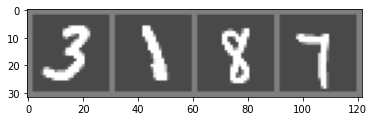

trois    un  huit  sept


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [8]:
# # parition des ensembles
# n_train = 28*10
# # rescale the data, use the traditional train/test split
# X_appVal, X_test = X[:200,:], X[200:,:]
# t_appVal, t_test = t[:200,:], t[200:,:]

On va construire un réseau de neurone à l'aide de la bibliothèque `torch`.
(Le module ` torch.nn` que nous utilisons pour construire notre réseau se repose sur `autograd` qui permettra de définir des modèles et à les différentier.
Un réseau est constitué de couche i.e. déléments de type `nn.Conv2d` ou `nn.Linear`. 
Il est aussi caractérisé par une méthode `forward` qui permet de calculer les sorties (`output`) pour des entrées `input`
For example, look at this network that classifies digit images:

.. figure:: /_static/img/mnist.png
   :alt: convnet

   convnet

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

In [9]:
#?nn.Conv2d

## Réalisation d'un réseau de neurones convolutif

### 1. Définition d'un modèle d'architecture

You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``

In [10]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 5, 3)
        self.conv2 = nn.Conv2d(5, 10, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(10 * 5 * 5, 121)  # 6*6 from image dimension 
        if False:
            self.fc2 = nn.Linear(121, 84)
            self.fc3 = nn.Linear(84, 10)
        else:
            self.fc2 = nn.Linear(121, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        #x = x.view(-1, self.num_flat_features(x))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        if False:
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
        else:
            x = self.fc2(x)
                   
        return x

#    def num_flat_features(self, x):
#        size = x.size()[1:]  # all dimensions except the batch dimension
#        num_features = 1
#        for s in size:
#            num_features *= s
#        return num_features
    
net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=121, bias=True)
  (fc2): Linear(in_features=121, out_features=10, bias=True)
)


In [11]:
#%whos

### 2. Définition d'une fonction de coût et d'un optimiseur
Ici, on utilise l'entropie croisée comme coût de classification ainsi qu'un optimiseur de type descente de gradient stochastique avec moment.

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Let try a random 32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
MNIST dataset, please resize the images from the dataset to 32x32.

## Apprentissage

Pour apprendre le réseau, on boucle sur notre jeu de données pour optimiser le réseau.

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # validationn performances
        total_loss_val = 0
        for inputs_val, labels_val in valloader:
            
            #Wrap tensors in Variables
            inputs_val, labels_val = Variable(inputs_val), Variable(labels_val)
            
            #Forward pass
            outputs_val = net(inputs_val)
            loss_size_val = criterion(outputs_val, labels_val)
            #print(loss_size_val.item())
            #total_loss_val += loss_size_val.data[0]
            total_loss_val += loss_size_val.item()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99: # print every 2000 mini-batches
                        # et donc pour    
            print('[%d, %5d] loss: %.3f (%.3f)' %
                  (epoch + 1, 
                   i + 1, 
                   running_loss   / 10 / batch_size,
                  total_loss_val / n_val_samples*batch_size))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 5.690 (2.241)
[1,   200] loss: 5.314 (1.965)
[2,   100] loss: 2.697 (0.896)
[2,   200] loss: 1.859 (0.934)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-34fdda334ec3>", line 19, in <module>
    for inputs_val, labels_val in valloader:
  File "/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 576, in __next__
    idx, batch = self._get_batch()
  File "/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 553, in _get_batch
    success, data = self._try_get_batch()
  File "/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 511, in _try_get_batch
    data = self.data_queue.get(timeout=timeout)
  File "/home/moumene/.conda/envs/ds/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/home/moumene/.conda/envs/ds/lib/python3.6/si

TypeError: object of type 'NoneType' has no len()

Let's quickly save our trained model:

In [ ]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
inputs.size()

On recharge le réseau et on evalue les performances

In [ ]:
#net = Net()
#net.load_state_dict(torch.load(PATH))

In [ ]:
#outputs = net(images)
#outputs

The outputs are energies for the 10 classes.  
The higher the energy for a class, the more the network thinks that the image is of the particular class.  
So, let's get the index of the highest energy: 

In [ ]:
_, predicted = torch.max(outputs, 0)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes).  
Seems like the network learnt something.  
Hmmm, what are the classes that performed well, and the classes that did not perform well: 

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
#?%who